In [1]:
from src.skeleton import BaseModel

In [2]:
import numpy as np
X = np.random.rand(100,2)
Y = 100*(X[:,0] + X[:,1]) + np.random.rand(100)
X[:,1] *= 3000

(100, 2) (100,)


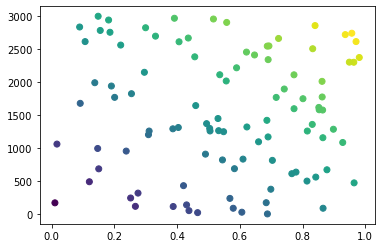

In [3]:
import matplotlib.pyplot as plt
print(X.shape, Y.shape)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [4]:
from torch.utils.data import Dataset, DataLoader
class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, index):
        X = self.X[index]
        Y = self.Y[index]
        return X, Y, True

In [5]:
train_dataset = MyDataset(X,Y)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=100)
test_loader = DataLoader(train_dataset, batch_size=100)

In [6]:
import torch
import torch.nn as nn

class MyModel(BaseModel):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.fc1 = nn.Linear(in_dim,4)
        self.fc2 = nn.Linear(4,out_dim)
        self.relu = nn.ReLU()
    def forward(self, batch, label=None, mask=None):
        x = self.fc1(batch)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    def criterion(self, pred=None, batch=None, label=None, mask=None):
        loss = nn.MSELoss()(pred.view(-1), label)
        return loss

In [7]:
model = MyModel(2,1)
model.cuda()

MyModel(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
)

In [8]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), 0.1)
model.train_model(train_loader, test_loader, 100, optimizer, report_intv=10)

(0.28s) [Epoch 1]
	Train Loss : 5.3533e+03	Train Score : 0.0000
	Eval Loss : 9.0630e+03	Eval Score : 0.0000
(0.00s) [Epoch 11]
	Train Loss : 2.7892e+03	Train Score : 0.0000
	Eval Loss : 1.8753e+03	Eval Score : 0.0000
(0.00s) [Epoch 21]
	Train Loss : 2.0116e+03	Train Score : 0.0000
	Eval Loss : 1.7540e+03	Eval Score : 0.0000
(0.00s) [Epoch 31]
	Train Loss : 1.6449e+03	Train Score : 0.0000
	Eval Loss : 1.6103e+03	Eval Score : 0.0000
(0.00s) [Epoch 41]
	Train Loss : 1.5069e+03	Train Score : 0.0000
	Eval Loss : 1.5028e+03	Eval Score : 0.0000
(0.00s) [Epoch 51]
	Train Loss : 1.4485e+03	Train Score : 0.0000
	Eval Loss : 1.4390e+03	Eval Score : 0.0000
(0.00s) [Epoch 61]
	Train Loss : 1.4080e+03	Train Score : 0.0000
	Eval Loss : 1.3994e+03	Eval Score : 0.0000
(0.00s) [Epoch 71]
	Train Loss : 1.3747e+03	Train Score : 0.0000
	Eval Loss : 1.3711e+03	Eval Score : 0.0000
(0.00s) [Epoch 81]
	Train Loss : 1.3462e+03	Train Score : 0.0000
	Eval Loss : 1.3440e+03	Eval Score : 0.0000
(0.00s) [Epoch 91]
	

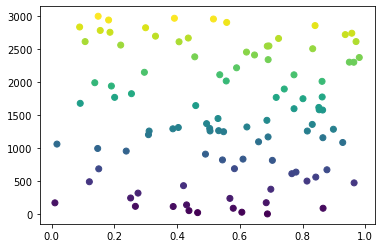

In [9]:
X_pt,_,_ = next(iter(train_loader))
with torch.no_grad():
    pred = model(X_pt.to(device='cuda',dtype=torch.float))


plt.scatter(X_pt.cpu()[:,0], X_pt.cpu()[:,1], c=pred.cpu())
plt.show()

In [10]:
lb = X.min(axis=0)
ub = X.max(axis=0)
print(lb.shape, ub.shape)
for i in range(2):
    lower_boundary = lb[i]
    upper_boundary = ub[i]
    print('[%d]  %.4f  ~  %.4f'%(i, lower_boundary, upper_boundary))

(2,) (2,)
[0]  0.0104  ~  0.9809
[1]  4.6951  ~  2991.7777


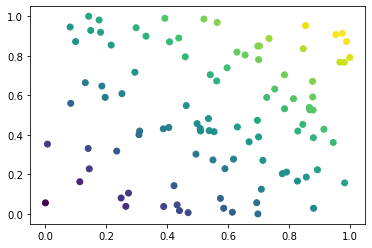

In [11]:
import matplotlib.pyplot as plt
X_norm = (X - lb) / (ub - lb + 1e-10)
plt.scatter(X_norm[:,0], X_norm[:,1], c=Y)
plt.show()

In [12]:
class MyModel_Norm(BaseModel):
    def __init__(self, in_dim, out_dim, lb, ub):
        super().__init__()
        self.fc1 = nn.Linear(in_dim,4)
        self.fc2 = nn.Linear(4,out_dim)
        self.relu = nn.ReLU()
        self.lb = torch.from_numpy(lb).to(device='cuda', dtype=torch.float)
        self.ub = torch.from_numpy(ub).to(device='cuda', dtype=torch.float)
    def forward(self, batch, label=None, mask=None):
        x = self.fc1(batch)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    def criterion(self, pred=None, batch=None, label=None, mask=None):
        loss = nn.MSELoss()(pred.view(-1), label)
        return loss
    def preprocess(self, batch, label=None, mask=None):
        batch = (batch-self.lb) / (self.ub-self.lb+1e-10)
        return batch

In [13]:
model = MyModel_Norm(2,1, lb=lb, ub=ub)
model.cuda()

import torch.optim as optim
optimizer = optim.Adam(model.parameters(), 0.1)
model.train_model(train_loader, test_loader, 100, optimizer, report_intv=10)

(0.00s) [Epoch 1]
	Train Loss : 1.2894e+04	Train Score : 0.0000
	Eval Loss : 1.2848e+04	Eval Score : 0.0000
(0.00s) [Epoch 11]
	Train Loss : 1.2187e+04	Train Score : 0.0000
	Eval Loss : 1.2065e+04	Eval Score : 0.0000
(0.00s) [Epoch 21]
	Train Loss : 1.0491e+04	Train Score : 0.0000
	Eval Loss : 1.0262e+04	Eval Score : 0.0000
(0.00s) [Epoch 31]
	Train Loss : 7.7635e+03	Train Score : 0.0000
	Eval Loss : 7.4469e+03	Eval Score : 0.0000
(0.00s) [Epoch 41]
	Train Loss : 4.4915e+03	Train Score : 0.0000
	Eval Loss : 4.1722e+03	Eval Score : 0.0000
(0.00s) [Epoch 51]
	Train Loss : 1.7265e+03	Train Score : 0.0000
	Eval Loss : 1.5217e+03	Eval Score : 0.0000
(0.00s) [Epoch 61]
	Train Loss : 4.8035e+02	Train Score : 0.0000
	Eval Loss : 4.4255e+02	Eval Score : 0.0000
(0.00s) [Epoch 71]
	Train Loss : 4.3816e+02	Train Score : 0.0000
	Eval Loss : 4.4781e+02	Eval Score : 0.0000
(0.00s) [Epoch 81]
	Train Loss : 4.3897e+02	Train Score : 0.0000
	Eval Loss : 4.2934e+02	Eval Score : 0.0000
(0.00s) [Epoch 91]
	

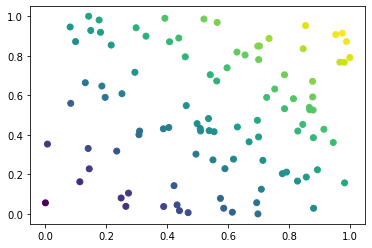

In [14]:
X_pt,_,_ = next(iter(train_loader))
with torch.no_grad():
    X_pt = X_pt.to(device='cuda',dtype=torch.float)
    X_pt = model.preprocess(X_pt)
    pred = model(X_pt)


plt.scatter(X_pt.cpu()[:,0], X_pt.cpu()[:,1], c=pred.cpu())
plt.show()